In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head(5)

,brand,price,type,colour,msoffice,RAM,RAMtype,SSD,SSDCap,HDDCap,...,GPUramcap,OS,Touchscreen,Screensize,Screenreso,refreshrate,Bluetooth,Weight,BacklitKB,warranty
0,MSI,"₹45,990",Gaming Laptop,Black,No,8 GB,DDR5,Yes,512 GB,0,...,4 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920 X 1080 Pixel,144 Hz,v5.3,2.35 Kg,Yes,1 Year Carry-in Warranty
1,AXL,"₹16,970",Thin and Light Laptop,Space Grey,No,4 GB,DDR4,Yes,256 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920*1080 pixel,60,yes,NaN,No,1 Year
2,HP,"₹36,990",Thin and Light Laptop,Natural Silver,Yes,8 GB,DDR4,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixels,60,v5.0,1.69 kg,Yes,1 Year Onsite Warranty
3,Acer,"₹29,990",Thin and Light Laptop,Steel Gray,No,8 GB,LPDDR5,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixel,60,v5.1,1.78 Kg,No,1 Year International Travelers Warranty
4,HP,"₹32,990",Thin and Light Laptop,Natural Silver,Yes,8 GB,DDR4,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920 x 1080 Pixel,60,v4.2,1.69 Kg,No,1 Year Onsite Warranty


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             1916 non-null   object
 1   price             1916 non-null   object
 2   type              1916 non-null   object
 3   colour            1916 non-null   object
 4   msoffice          1916 non-null   object
 5   RAM               1916 non-null   object
 6   RAMtype           1916 non-null   object
 7   SSD               1916 non-null   object
 8   SSDCap            1916 non-null   object
 9   HDDCap            1916 non-null   object
 10  ProcessorBrand    1916 non-null   object
 11  ProcessorName     1916 non-null   object
 12  ProcessorVariant  1715 non-null   object
 13  ClockSpeed        1675 non-null   object
 14  GPU               1866 non-null   object
 15  GPUramtype        1916 non-null   object
 16  GPUramcap         1916 non-null   object
 17  OS            

In [4]:
df = df.drop('SSD',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             1916 non-null   object
 1   price             1916 non-null   object
 2   type              1916 non-null   object
 3   colour            1916 non-null   object
 4   msoffice          1916 non-null   object
 5   RAM               1916 non-null   object
 6   RAMtype           1916 non-null   object
 7   SSDCap            1916 non-null   object
 8   HDDCap            1916 non-null   object
 9   ProcessorBrand    1916 non-null   object
 10  ProcessorName     1916 non-null   object
 11  ProcessorVariant  1715 non-null   object
 12  ClockSpeed        1675 non-null   object
 13  GPU               1866 non-null   object
 14  GPUramtype        1916 non-null   object
 15  GPUramcap         1916 non-null   object
 16  OS                1916 non-null   object
 17  Touchscreen   

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

brand                 0
price                 0
type                  0
colour                0
msoffice              0
RAM                   0
RAMtype               0
SSDCap                0
HDDCap                0
ProcessorBrand        0
ProcessorName         0
ProcessorVariant    155
ClockSpeed          191
GPU                  47
GPUramtype            0
GPUramcap             0
OS                    0
Touchscreen           0
Screensize            0
Screenreso            0
refreshrate           0
Bluetooth             0
Weight              152
BacklitKB            99
warranty              0
dtype: int64

In [8]:
df['price'] = df.pop('price')

### Converting price column to numeric

In [9]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [10]:
df['price']

0        45990.0
1        16970.0
2        36990.0
3        29990.0
4        32990.0
          ...   
1899     46800.0
1905     27990.0
1908     33900.0
1909     62990.0
1910    116000.0
Name: price, Length: 1532, dtype: float64

### Analysing Touchscreen, Backlit Keyboard and MS Office

In [11]:
df['Touchscreen'].value_counts()

Touchscreen
No     1420
Yes     112
Name: count, dtype: int64

In [12]:
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [13]:
df['Touchscreen'].value_counts()

Touchscreen
0    1420
1     112
Name: count, dtype: int64

In [14]:
df['msoffice'].value_counts()

msoffice
Yes    902
No     630
Name: count, dtype: int64

In [15]:
df['msoffice'] = df['msoffice'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [16]:
df['msoffice'].value_counts()

msoffice
1    902
0    630
Name: count, dtype: int64

In [17]:
print(df['BacklitKB'].value_counts())
print(df['BacklitKB'].isnull().sum())

BacklitKB
No     744
Yes    689
Name: count, dtype: int64
99


In [18]:
df['BacklitKB'] = df['BacklitKB'].fillna('No')
df['BacklitKB'].value_counts()

BacklitKB
No     843
Yes    689
Name: count, dtype: int64

In [19]:
df['BacklitKB'] = df['BacklitKB'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [20]:
df['BacklitKB'].value_counts()

BacklitKB
0    843
1    689
Name: count, dtype: int64

### Calculating PPI

In [21]:
df.head(5)

,brand,type,colour,msoffice,RAM,RAMtype,SSDCap,HDDCap,ProcessorBrand,ProcessorName,...,OS,Touchscreen,Screensize,Screenreso,refreshrate,Bluetooth,Weight,BacklitKB,warranty,price
0,MSI,Gaming Laptop,Black,0,8 GB,DDR5,512 GB,0,AMD,Ryzen 5 Hexa Core,...,Windows 11 Home,0,39.62 cm (15.6 inch),1920 X 1080 Pixel,144 Hz,v5.3,2.35 Kg,1,1 Year Carry-in Warranty,45990.0
1,AXL,Thin and Light Laptop,Space Grey,0,4 GB,DDR4,256 GB,0,Intel,Celeron Dual Core,...,Windows 11 Home,0,39.62 cm (15.6 inch),1920*1080 pixel,60,yes,NaN,0,1 Year,16970.0
2,HP,Thin and Light Laptop,Natural Silver,1,8 GB,DDR4,512 GB,0,Intel,Core i3,...,Windows 11 Home,0,39.62 cm (15.6 Inch),1920 x 1080 Pixels,60,v5.0,1.69 kg,1,1 Year Onsite Warranty,36990.0
3,Acer,Thin and Light Laptop,Steel Gray,0,8 GB,LPDDR5,512 GB,0,AMD,Ryzen 5 Quad Core,...,Windows 11 Home,0,39.62 cm (15.6 Inch),1920 x 1080 Pixel,60,v5.1,1.78 Kg,0,1 Year International Travelers Warranty,29990.0
4,HP,Thin and Light Laptop,Natural Silver,1,8 GB,DDR4,512 GB,0,AMD,Ryzen 3 Quad Core,...,Windows 11 Home,0,39.62 cm (15.6 inch),1920 x 1080 Pixel,60,v4.2,1.69 Kg,0,1 Year Onsite Warranty,32990.0


In [22]:
df['Screenreso'].isnull().sum()

0

In [23]:
df['Screenreso'].unique()

array(['1920 X 1080 Pixel', '1920*1080 pixel', '1920 x 1080 Pixels',
       '1920 x 1080 Pixel', '1366 x 768 pixel pixel', '2256x1504 pixel',
       '1920x1080 Pixels', '1366 x 768 Pixel', '1366 x 768 pixel',
       '1920 x 1200 Pixels', '1920 X 1080 pixel', '1920x 1080 pixel',
       '1920x1080 pixel', '2880 x 1800 Pixels', '1920 x 1080 pixel',
       '1366 x 768$$Pixels pixel', '1920 x 1200 Pixel',
       '1366 x 768 Pixels', '2560 x 1600 Pixel', '2880 x 1800 Pixel',
       '1920 x 1020 Pixel', '2240 x 1400 Pixel', '2560 x 1664 Pixel',
       '1920 x 1200 pixel', '2560 x 1440 Pixel', '720P HD camera pixel',
       '1080*1920 pixel', '1080 * 1920 pixel', '1920 X1080 pixel',
       '3840 x 2400 Pixel', '1920 x 1080 Pixels pixel',
       'FHD (1920 x 1080) OLED pixel', '2160 x 1440 Pixel',
       '1920×1080 pixel', '2880 x 1864 Pixel', '1920x 1080$$Pixels pixel',
       '1920 x 1080$$Pixels pixel', '1,920 x 1,080 pixels pixel',
       '1920 * 1200 pixel', '1366 X 768 pixel', '1920 × 108

In [24]:
df['Screenreso'] = df['Screenreso'].replace('720P HD camera pixel', '1280 x 720 pixels')
df['Screenreso'] = df['Screenreso'].str.replace(',','')

In [25]:
df[['X_res', 'Y_res']] = df['Screenreso'].str.extract(r'(\d+)\D+(\d+)')

In [26]:
print(df['X_res'].unique())
print(df['Y_res'].unique())

['1920' '1366' '2256' '2880' '2560' '2240' '1280' '1080' '3840' '2160'
 '3024' '2220' '1024' '2496' '3456' '3000' '3200' '2561']
['1080' '768' '1504' '1200' '1800' '1600' '1020' '1400' '1664' '1440'
 '720' '1920' '2400' '1864' '1964' '2234' '2000' '1620' '2160']


In [27]:
df['Screensize'].isnull().sum()

0

In [28]:
df['Screensize'].unique()

array(['39.62 cm (15.6 inch)', '39.62 cm (15.6 Inch)',
       '35.56 cm (14 inch)', '34.29 cm (13.5 inch)', '35.56 cm (14 Inch)',
       '33.78 cm (13.3 Inch)', '96.52 cm (38 cm)',
       '39.01 cm (15.36 inch)', '38.0 cm (14.96 inch)',
       '40.64 cm (16 Inch)', '35.81 cm (14.1 inch)',
       '100.63 cm (39.62 cm)', '33.78 cm (13.3 inch)',
       '40.89 cm (16.1 Inch)', '34.54 cm (13.6 Inch)',
       '40.64 cm (16 inch)', '29.46 cm (11.6 inch)', '99.06 cm (39 cm)',
       '40.89 cm (16.1 inch)', '38.86 cm (15.3 Inch)',
       '43.94 cm (17.3 Inch)', '43.94 cm (17.3 inch)',
       '85.8 cm (33.78 cm)', '35.05 cm (13.8 Inch)', '38.1 cm (15 inch)',
       '29.46 cm (11.6 Inch)', '42.16 cm (16.6 inch)',
       '35.0 cm (13.78 inch)', '33.02 cm (13 inch)', '17.78 cm (7 Inch)',
       '35.81 cm (14.1 Inch)', '36.83 cm (14.5 Inch)',
       '36.07 cm (14.2 inch)', '34.29 cm (13.5 Inch)',
       '35.56 cm (14 inches)', '34.04 cm (13.4 inch)',
       '41.15 cm (16.2 inch)', '34.19 cm (13.46 i

In [29]:
df['Screensize'] = df['Screensize'].str.extract(r'\((.*?)\)')

In [30]:
df['Screensize'].unique()

array(['15.6 inch', '15.6 Inch', '14 inch', '13.5 inch', '14 Inch',
       '13.3 Inch', '38 cm', '15.36 inch', '14.96 inch', '16 Inch',
       '14.1 inch', '39.62 cm', '13.3 inch', '16.1 Inch', '13.6 Inch',
       '16 inch', '11.6 inch', '39 cm', '16.1 inch', '15.3 Inch',
       '17.3 Inch', '17.3 inch', '33.78 cm', '13.8 Inch', '15 inch',
       '11.6 Inch', '16.6 inch', '13.78 inch', '13 inch', '7 Inch',
       '14.1 Inch', '14.5 Inch', '14.2 inch', '13.5 Inch', '14 inches',
       '13.4 inch', '16.2 inch', '13.46 inch', '15.6 mm', '10.1 Inch',
       '14.96 Inch'], dtype=object)

In [31]:
df['Screensize'] = df['Screensize'].str.split()

In [32]:
df['Screensize']=df['Screensize'].apply(lambda x: float(x[0]))

In [33]:
print(df['Screensize'].isnull().sum())
print(df['Screensize'].value_counts())

0
Screensize
15.60    874
14.00    379
16.00     98
17.30     32
13.30     31
16.10     24
11.60     17
14.10     12
15.30      8
38.00      7
39.62      6
13.60      5
13.00      4
13.50      4
15.00      4
16.20      3
13.78      3
13.40      3
14.96      2
39.00      2
15.36      2
7.00       2
14.50      2
14.20      2
13.80      2
13.46      1
16.60      1
33.78      1
10.10      1
Name: count, dtype: int64


In [34]:
df['X_res'] = pd.to_numeric(df['X_res'])
df['Y_res'] = pd.to_numeric(df['Y_res'])

In [35]:
print(df['X_res'].unique())
print(df['Y_res'].unique())

[1920 1366 2256 2880 2560 2240 1280 1080 3840 2160 3024 2220 1024 2496
 3456 3000 3200 2561]
[1080  768 1504 1200 1800 1600 1020 1400 1664 1440  720 1920 2400 1864
 1964 2234 2000 1620 2160]


In [36]:
df['PPI'] = ( (df['X_res'] ** 2 + df['Y_res'] ** 2) ** 0.5 ) / df['Screensize']
df['PPI']

0       141.211998
1       141.211998
2       141.211998
3       141.211998
4       141.211998
           ...    
1899    157.350512
1905    141.211998
1908    141.211998
1909    141.211998
1910    127.335675
Name: PPI, Length: 1532, dtype: float64

In [37]:
df = df.drop(columns=['X_res', 'Y_res', 'Screensize'])

### Working with Storage

In [38]:
print(df['SSDCap'].unique())
print(df['HDDCap'].unique())

['512 GB' '256 GB' '0' '1 TB' '128 GB' '2 TB' 'No' '16 GB']
['0' '1 TB' '512 GB' 'No' '128 GB']


In [39]:
print(df['SSDCap'].isnull().sum())
print(df['HDDCap'].isnull().sum())

0
0


In [40]:
def convert_to_gb(capacity):
    if capacity == 'No':
        return 0
    elif 'TB' in capacity:
        return int(capacity.replace(' TB', '')) * 1024  # Convert TB to GB
    elif 'GB' in capacity:
        return int(capacity.replace(' GB', ''))
    else:
        return 0

In [41]:
df['SSDCap'] = df['SSDCap'].apply(convert_to_gb)
df['HDDCap'] = df['HDDCap'].apply(convert_to_gb)

In [42]:
print(df['SSDCap'].unique())
print(df['HDDCap'].unique())

[ 512  256    0 1024  128 2048   16]
[   0 1024  512  128]


In [43]:
print(df['SSDCap'].isnull().sum())
print(df['HDDCap'].isnull().sum())

0
0


### Working with RAM

In [44]:
df['RAM'].unique()

array(['8 GB', '4 GB', '12 GB', '16 GB', '32 GB', '36 GB', '18 GB',
       '64 GB', '2 GB'], dtype=object)

In [45]:
df['RAM'].isnull().sum()

0

In [46]:
df['RAM'] = df['RAM'].apply(lambda x: int(x.replace(' GB','')))

In [47]:
df['RAM'].unique()

array([ 8,  4, 12, 16, 32, 36, 18, 64,  2], dtype=int64)

### Working with GPU

In [48]:
df.isnull().sum()

brand                 0
type                  0
colour                0
msoffice              0
RAM                   0
RAMtype               0
SSDCap                0
HDDCap                0
ProcessorBrand        0
ProcessorName         0
ProcessorVariant    155
ClockSpeed          191
GPU                  47
GPUramtype            0
GPUramcap             0
OS                    0
Touchscreen           0
Screenreso            0
refreshrate           0
Bluetooth             0
Weight              152
BacklitKB             0
warranty              0
price                 0
PPI                   0
dtype: int64

In [49]:
df['GPU'].fillna('NIL', inplace=True)

C:\Users\vsing\AppData\Local\Temp\ipykernel_19048\2068183279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPU'].fillna('NIL', inplace=True)


In [50]:
df['GPU'].isnull().sum()

0

In [51]:
Nvidia1 = df['GPU'].apply(lambda x: x if isinstance(x, str) and 'MediaTek' in x else None).dropna().tolist()
set(Nvidia1)

{'MediaTek Integrated',
 'MediaTek Integrated ARM Mali G72',
 'MediaTek Integrated ARM Mali-G52 2EE MC2',
 'MediaTek Integrated Integrated',
 'MediaTek Integrated Iris Xe'}

In [52]:
def check_nvidia_models(text):
    if "NVIDIA GeForce GTX" in text:
        if "1650 Ti" in text:
            return "NVIDIA GeForce GTX 1650 Ti"
        elif "1650 Max Q" in text:
            return "NVIDIA GeForce GTX 1650 Max Q"
        else:
            return "NVIDIA GeForce GTX 1650"
    elif "NVIDIA GeForce RTX" in text:
        if "2050" in text:
            return "NVIDIA GeForce RTX 2050"
        elif "3050" in text:
            return "NVIDIA GeForce RTX 3050"
        elif "3050 Ti" in text:
            return "NVIDIA GeForce RTX 3050 Ti"
        elif "3060" in text:
            return "NVIDIA GeForce RTX 3060" 
        elif "3070" in text:
            return "NVIDIA GeForce RTX 3070"
        elif "3070 Ti" in text:
            return "NVIDIA GeForce RTX 3070 Ti"
        elif "3080" in text:
            return "NVIDIA GeForce RTX 3080"
        elif "3080 Ti" in text:
            return "NVIDIA GeForce RTX 3080 Ti"
        elif "4050" in text:
            return "NVIDIA GeForce RTX 4050"
        elif "4060" in text:
            return "NVIDIA GeForce RTX 4060"
        elif "4070" in text:
            return "NVIDIA GeForce RTX 4070"
        elif "4080" in text:
            return "NVIDIA GeForce RTX 4080"
        elif "4090" in text:
            return "NVIDIA GeForce RTX 4090"
    elif "NVIDIA GeForce MX" in text:
        if "150" in text:
            return "NVIDIA GeForce MX150"
        elif "330" in text:
            return "NVIDIA GeForce MX330"
        elif "450" in text:
            return "NVIDIA GeForce MX450"
        elif "550" in text:
            return "NVIDIA GeForce MX550"
    elif "AMD Radeon" in text:
        if "Vega 7" in text:
            return "AMD Radeon Vega 7"
        elif "Vega 8" in text:
            return "AMD Radeon Vega 8"
        elif "RX Vega 10" in text:
            return "AMD Radeon RX Vega 10"
        elif "RX 6500M" in text or "RX6500M" in text:
            return "AMD Radeon RX 6500M"
        elif "RX 6550M" in text or "RX6550M" in text:
            return "AMD Radeon RX 6550M"
        elif "RX 6650M" in text:
            return "AMD Radeon RX 6650M"
        elif "RX 6800M" in text:
            return "AMD Radeon RX 6800M"
        elif "530" in text:
            return "AMD Radeon 530"
        elif "610M" in text:
            return "AMD Radeon 610M"
        elif "Integrated" in text:
            return "AMD Radeon Integrated"
        elif "Athlon 3000G" in text:
            return "AMD Radeon Athlon 3000G"
        elif "R7" in text:
            return "AMD Radeon R7"
        else:
            return "AMD Radeon Vega Graphics"
    elif "Intel" in text:
        if "UHD" in text:
            return "Intel Integrated UHD"
        elif "Iris" in text:
            if "Plus" in text:
                return "Intel Integrated Iris Plus Graphics"
            elif "X" in text:
                return "Intel Integrated Iris X graphics"
            else:
                return "Intel Integrated Iris Xe Graphics"
        else:
            return "Intel Integrated Graphics"
    elif "MediaTek" in text:
        return "MediaTek Integrated Graphics"
    else:
        return "NIL"

df['GPU'] = df['GPU'].apply(check_nvidia_models)


In [53]:
df['GPU'].unique()

array(['AMD Radeon RX 6550M', 'Intel Integrated Graphics',
       'Intel Integrated UHD', 'AMD Radeon Vega Graphics',
       'AMD Radeon Vega 8', 'AMD Radeon 610M',
       'Intel Integrated Iris X graphics', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 2050', 'NIL',
       'AMD Radeon RX 6500M', 'MediaTek Integrated Graphics',
       'Intel Integrated Iris Plus Graphics', 'NVIDIA GeForce RTX 4050',
       'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce MX550', 'NVIDIA GeForce MX450',
       'NVIDIA GeForce GTX 1650 Max Q', 'NVIDIA GeForce RTX 4060',
       'NVIDIA GeForce RTX 3070', 'AMD Radeon Integrated',
       'NVIDIA GeForce GTX 1650 Ti', 'NVIDIA GeForce RTX 4070',
       'AMD Radeon 530', 'NVIDIA GeForce RTX 3080',
       'AMD Radeon RX Vega 10', 'NVIDIA GeForce MX150',
       'AMD Radeon Athlon 3000G', 'AMD Radeon R7', 'AMD Radeon RX 6800M',
       None, 'NVIDIA GeForce MX330', 'AMD Radeon RX 6650M',
       'NVIDIA GeFor

### Dropping Uneccessary Column

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 1910
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1532 non-null   object 
 1   type              1532 non-null   object 
 2   colour            1532 non-null   object 
 3   msoffice          1532 non-null   int64  
 4   RAM               1532 non-null   int64  
 5   RAMtype           1532 non-null   object 
 6   SSDCap            1532 non-null   int64  
 7   HDDCap            1532 non-null   int64  
 8   ProcessorBrand    1532 non-null   object 
 9   ProcessorName     1532 non-null   object 
 10  ProcessorVariant  1377 non-null   object 
 11  ClockSpeed        1341 non-null   object 
 12  GPU               1531 non-null   object 
 13  GPUramtype        1532 non-null   object 
 14  GPUramcap         1532 non-null   object 
 15  OS                1532 non-null   object 
 16  Touchscreen       1532 non-null   int64  
 17  

In [55]:
df = df.drop(columns=['colour','ClockSpeed','Screenreso','GPUramcap','GPUramtype','Bluetooth','RAMtype'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 1910
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1532 non-null   object 
 1   type              1532 non-null   object 
 2   msoffice          1532 non-null   int64  
 3   RAM               1532 non-null   int64  
 4   SSDCap            1532 non-null   int64  
 5   HDDCap            1532 non-null   int64  
 6   ProcessorBrand    1532 non-null   object 
 7   ProcessorName     1532 non-null   object 
 8   ProcessorVariant  1377 non-null   object 
 9   GPU               1531 non-null   object 
 10  OS                1532 non-null   object 
 11  Touchscreen       1532 non-null   int64  
 12  refreshrate       1532 non-null   object 
 13  Weight            1380 non-null   object 
 14  BacklitKB         1532 non-null   int64  
 15  warranty          1532 non-null   object 
 16  price             1532 non-null   float64
 17  

# Working with Processor

In [57]:
print(df['ProcessorBrand'].unique())
print(df['ProcessorName'].unique())

['AMD' 'Intel' 'MediaTek' 'Apple']
['Ryzen 5 Hexa Core' 'Celeron Dual Core' 'Core i3' 'Ryzen 5 Quad Core'
 'Ryzen 3 Quad Core' 'Ryzen 3 Dual Core' 'Athlon Dual Core' 'Core i5'
 'Celeron Quad Core' 'Ryzen 7 Octa Core' 'Ryzen 3 Hexa Core' 'Core i7'
 'MediaTek Kompanio 520' 'M1' 'M2' 'Core i9' 'Core Ultra 7'
 'MediaTek Kompanio 1200' 'Ryzen 5 Dual Core' 'Ryzen 3 Octa Core'
 'Core Ultra 5' 'M3' 'Ryzen 7 Hexa Core' 'Ryzen 9 Octa Core' 'M3 Max'
 'Ryzen 7 Quad Core' 'Ryzen Z1 HexaCore' 'M3 Pro' 'Ryzen 7 Dual Core'
 'M2 Max' 'Ryzen 5' 'M1 Pro' 'APU Quad Core A12' 'Core 7' 'M1 Max'
 'Pentium Quad Core' 'Pentium Silver' 'MediaTek Kompanio 500'
 'Atom Quad Core' 'MediaTek P60T' 'MediaTek MT8788']


In [58]:
print(df['ProcessorBrand'].isnull().sum())
print(df['ProcessorName'].isnull().sum())

0
0


In [59]:
df['Processor'] = df['ProcessorBrand'] + ' ' + df['ProcessorName']

In [60]:
df['Processor'].unique()

array(['AMD Ryzen 5 Hexa Core', 'Intel Celeron Dual Core',
       'Intel Core i3', 'AMD Ryzen 5 Quad Core', 'AMD Ryzen 3 Quad Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core', 'Intel Core i5',
       'Intel Celeron Quad Core', 'AMD Ryzen 7 Octa Core',
       'AMD Ryzen 3 Hexa Core', 'Intel Core i7',
       'MediaTek MediaTek Kompanio 520', 'Apple M1', 'Apple M2',
       'Intel Core i9', 'Intel Core Ultra 7',
       'MediaTek MediaTek Kompanio 1200', 'AMD Ryzen 5 Dual Core',
       'AMD Ryzen 3 Octa Core', 'Intel Core Ultra 5', 'Apple M3',
       'AMD Ryzen 7 Hexa Core', 'AMD Ryzen 9 Octa Core', 'Apple M3 Max',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen Z1 HexaCore', 'Apple M3 Pro',
       'AMD Ryzen 7 Dual Core', 'Apple M2 Max', 'AMD Ryzen 5',
       'Apple M1 Pro', 'AMD APU Quad Core A12', 'Intel Core 7',
       'Apple M1 Max', 'Intel Pentium Quad Core', 'Intel Pentium Silver',
       'MediaTek MediaTek Kompanio 500', 'Intel Atom Quad Core',
       'MediaTek MediaTek P60T

In [61]:
df['Processor'].isnull().sum()

0

In [62]:
df = df.drop(columns = ['ProcessorBrand','ProcessorName','ProcessorVariant'])

### Working with weight and warranty

In [63]:
df['Weight'].isnull().sum()

152

In [64]:
df['Weight'].unique()

array(['2.35 Kg', nan, '1.69 kg', '1.78 Kg', '1.69 Kg', '1.78 kg',
       '1.41 kg', '1340 g', '1.7 Kg', '1.65 Kg', '1.4 Kg', '1.58 Kg',
       '1.80 Kg', '1.24 Kg', '1.80 kg', '1.98 kg', '1.74 Kg', '0.87 Kg',
       '1.57 Kg', '1.76 Kg', '1.46 kg', '1.6 Kg', '1.60 Kg', '2.30 Kg',
       '1.63 Kg', '1.76 kg', '1.70 kg', '1.83 Kg', '1.7 kg', '1.86 Kg',
       '1.65 kg', '1.8 kg', '2.30 kg', '1.49 Kg', '1.50 Kg', '1.48 Kg',
       '1.75 Kg', '1.89 kg', '2.1 Kg', '1.59 Kg', '1.39 kg', '2.0 Kg',
       '1.47 kg', '1.24 kg', '2.37 kg', '2.37 Kg', '2.32 Kg', '1.58 kg',
       '1.50 kg', '1.3 Kg', '1.41 Kg', '1.29 kg', '1.40 kg', '1.46 Kg kg',
       '2.4 Kg', '1.70 Kg', '1.57 kg', '2.48 Kg', '1.35 Kg', '0.91 kg',
       '2.5 Kg', '2.25 Kg', '1.25 kg', '1.60 kg', '2.20 kg', '1.38 Kg',
       '1.94 kg', '2.25 kg', '2 kg', '1.47 Kg', '2.20 Kg', '2.30 kg kg',
       '1.62 kg', '1.40 Kg', '1.69 Kgs', '2.6 Kg', '1.4 kg', '2.3 KG',
       '1.34 Kg', '2.57 kg', '2.32 kg', '1.54 Kg', '1.51 Kg', '1.88

In [65]:
df['type'].unique()

array(['Gaming Laptop', 'Thin and Light Laptop', 'Notebook',
       '2 in 1 Laptop', 'Business Laptop', 'Laptop', 'Chromebook',
       'Creator Laptop', 'Handheld Gaming PC', '2 in 1 Gaming Laptop'],
      dtype=object)

In [66]:
mode_weights = df.groupby('type')['Weight'].agg(lambda x: x.mode().iloc[0])
for laptop_type, mode_weight in mode_weights.items():
    df.loc[(df['type'] == laptop_type) & (df['Weight'].isnull()), 'Weight'] = mode_weight
print(df)

       brand                   type  msoffice  RAM  SSDCap  HDDCap  \
0        MSI          Gaming Laptop         0    8     512       0   
1        AXL  Thin and Light Laptop         0    4     256       0   
2         HP  Thin and Light Laptop         1    8     512       0   
3       Acer  Thin and Light Laptop         0    8     512       0   
4         HP  Thin and Light Laptop         1    8     512       0   
...      ...                    ...       ...  ...     ...     ...   
1899    DELL  Thin and Light Laptop         1   16     512       0   
1905    ASUS  Thin and Light Laptop         1    8     512       0   
1908  Lenovo  Thin and Light Laptop         0    8     512       0   
1909    ASUS  Thin and Light Laptop         1   16     512       0   
1910    ASUS          Gaming Laptop         1   16    1024       0   

                                   GPU               OS  Touchscreen  \
0                  AMD Radeon RX 6550M  Windows 11 Home            0   
1            In

In [67]:
df['Weight'].isnull().sum()

0

In [68]:
def convert_to_kg(weight):
    weight_lower = weight.lower()  
    if 'kg' in weight_lower:
        return float(weight_lower.split()[0])  
    elif 'g' in weight_lower:
        return float(weight_lower.split()[0]) / 1000      

In [69]:
df['Weight'] = df['Weight'].str.replace(',','.')
df['Weight'] = df['Weight'].apply(convert_to_kg)

In [70]:
df['Weight']

0       2.35
1       1.69
2       1.69
3       1.78
4       1.69
        ... 
1899    1.48
1905    1.57
1908    1.70
1909    1.80
1910    2.60
Name: Weight, Length: 1532, dtype: float64

In [71]:
df['Weight'].unique()

array([2.35 , 1.69 , 1.78 , 1.41 , 1.34 , 1.7  , 1.65 , 1.4  , 1.58 ,
       1.8  , 1.24 , 1.98 , 1.74 , 0.87 , 1.57 , 1.76 , 1.46 , 1.6  ,
       2.3  , 1.63 , 1.83 , 1.86 , 1.49 , 1.5  , 1.48 , 1.75 , 1.89 ,
       2.1  , 1.59 , 1.39 , 2.   , 1.47 , 2.37 , 2.32 , 1.3  , 1.29 ,
       2.4  , 1.88 , 2.48 , 1.35 , 0.91 , 2.5  , 2.25 , 1.25 , 2.2  ,
       1.38 , 1.94 , 1.62 , 2.6  , 2.57 , 1.54 , 1.51 , 1.32 , 1.21 ,
       2.08 , 1.55 , 2.49 , 1.2  , 0.999, 0.97 , 1.66 , 1.9  , 2.14 ,
       1.61 , 1.27 , 1.37 , 2.04 , 1.85 , 1.56 , 2.76 , 1.12 , 1.77 ,
       2.015, 0.608, 2.7  , 3.31 , 1.68 , 1.44 , 2.81 , 2.023, 1.52 ,
       2.51 , 1.43 , 2.34 , 1.26 , 1.17 , 1.05 , 1.87 , 1.91 , 2.39 ,
       0.984, 1.23 , 2.45 , 1.64 , 1.07 , 3.3  , 0.879, 2.65 , 1.   ,
       2.09 , 0.99 , 1.72 , 1.16 , 2.56 , 2.29 , 1.45 , 1.31 , 0.45 ,
       1.065])

In [72]:
df['Weight'].isnull().sum()

0

### Working with Refresh Rate

In [73]:
df['refreshrate'].unique()

array(['144 Hz', '60', '60 Hz', '120 Hz', '90 Hz', '165 Hz', '240 Hz',
       '75 Hz', '360 Hz', '300 Hz'], dtype=object)

In [74]:
df['refreshrate'].isnull().sum()

0

In [75]:
df['refreshrate'] = df['refreshrate'].str.replace(' Hz', '').astype(int)

In [76]:
df['refreshrate'].isnull().sum()

0

In [77]:
df['refreshrate'].unique()

array([144,  60, 120,  90, 165, 240,  75, 360, 300])

### Working with Warranty

In [78]:
df['warranty'].unique()

array(['1 Year Carry-in Warranty', '1 Year', '1 Year Onsite Warranty',
       '1 Year International Travelers Warranty',
       '1 Year Onsite Warranty + 1 Year ADP',
       '1 Year Onsite Hardware Service', '1 Year Onsite warranty by OEM',
       '1 Yr Onsite Warranty + 1 Yr Premium Care',
       '2 Year Carry-in Warranty', '1 Years', '1 Year Onsite warranty',
       '1 year onsite + 1 year accidental damage protection',
       '1Year Onsite Warranty',
       '1 Year International Travelers Warranty (ITW)',
       '1 Year Onsite ADP', '1 year warranty', '1 year Onsite Warranty',
       '1 Year Carry-in warranty', '2 Year warranty',
       '1 year Domestic warranty', '1 Year Limited Warra\xadnty',
       '1 Year onsite warranty', '1 Year Onsite Premium Support',
       '1 Year Limited Warranty', '1 year Warranty',
       '1 Year Carry Into Service Centre',
       '1 Year Onsite Premium Support with 1 Year Onsite Warranty',
       '2 Years On-Site Warranty', '1 Year manufacturer Warrant

In [79]:
df['warranty'].isnull().sum()

0

In [80]:
df['warranty'] = df['warranty'].str.extract(r'(\d+)(?= Year)')

In [81]:
df['warranty'].unique()

array(['1', nan, '2', '3'], dtype=object)

In [82]:
df['warranty'].fillna('1',inplace = True)

C:\Users\vsing\AppData\Local\Temp\ipykernel_19048\2284577593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['warranty'].fillna('1',inplace = True)


In [83]:
df['warranty'].unique()

array(['1', '2', '3'], dtype=object)

In [84]:
df['warranty'].isnull().sum()

0

In [85]:
df['warranty'] = df['warranty'].astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 1910
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1532 non-null   object 
 1   type         1532 non-null   object 
 2   msoffice     1532 non-null   int64  
 3   RAM          1532 non-null   int64  
 4   SSDCap       1532 non-null   int64  
 5   HDDCap       1532 non-null   int64  
 6   GPU          1531 non-null   object 
 7   OS           1532 non-null   object 
 8   Touchscreen  1532 non-null   int64  
 9   refreshrate  1532 non-null   int32  
 10  Weight       1532 non-null   float64
 11  BacklitKB    1532 non-null   int64  
 12  warranty     1532 non-null   int32  
 13  price        1532 non-null   float64
 14  PPI          1532 non-null   float64
 15  Processor    1532 non-null   object 
dtypes: float64(3), int32(2), int64(6), object(5)
memory usage: 191.5+ KB


In [87]:
df['OS'].unique()

array(['Windows 11 Home', 'DOS', 'Chrome', 'Mac OS Big Sur',
       'Mac OS Monterey', 'Ubuntu', 'Windows 10 Home', 'macOS Ventura',
       'Windows 10 Pro', 'macOS Sonoma', 'Windows 11 Pro', 'Windows 10',
       'Mac OS Mojave', 'Prime OS'], dtype=object)

In [88]:
df['Processor'].unique()

array(['AMD Ryzen 5 Hexa Core', 'Intel Celeron Dual Core',
       'Intel Core i3', 'AMD Ryzen 5 Quad Core', 'AMD Ryzen 3 Quad Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core', 'Intel Core i5',
       'Intel Celeron Quad Core', 'AMD Ryzen 7 Octa Core',
       'AMD Ryzen 3 Hexa Core', 'Intel Core i7',
       'MediaTek MediaTek Kompanio 520', 'Apple M1', 'Apple M2',
       'Intel Core i9', 'Intel Core Ultra 7',
       'MediaTek MediaTek Kompanio 1200', 'AMD Ryzen 5 Dual Core',
       'AMD Ryzen 3 Octa Core', 'Intel Core Ultra 5', 'Apple M3',
       'AMD Ryzen 7 Hexa Core', 'AMD Ryzen 9 Octa Core', 'Apple M3 Max',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen Z1 HexaCore', 'Apple M3 Pro',
       'AMD Ryzen 7 Dual Core', 'Apple M2 Max', 'AMD Ryzen 5',
       'Apple M1 Pro', 'AMD APU Quad Core A12', 'Intel Core 7',
       'Apple M1 Max', 'Intel Pentium Quad Core', 'Intel Pentium Silver',
       'MediaTek MediaTek Kompanio 500', 'Intel Atom Quad Core',
       'MediaTek MediaTek P60T

In [89]:
df['GPU'].unique()

array(['AMD Radeon RX 6550M', 'Intel Integrated Graphics',
       'Intel Integrated UHD', 'AMD Radeon Vega Graphics',
       'AMD Radeon Vega 8', 'AMD Radeon 610M',
       'Intel Integrated Iris X graphics', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 2050', 'NIL',
       'AMD Radeon RX 6500M', 'MediaTek Integrated Graphics',
       'Intel Integrated Iris Plus Graphics', 'NVIDIA GeForce RTX 4050',
       'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce MX550', 'NVIDIA GeForce MX450',
       'NVIDIA GeForce GTX 1650 Max Q', 'NVIDIA GeForce RTX 4060',
       'NVIDIA GeForce RTX 3070', 'AMD Radeon Integrated',
       'NVIDIA GeForce GTX 1650 Ti', 'NVIDIA GeForce RTX 4070',
       'AMD Radeon 530', 'NVIDIA GeForce RTX 3080',
       'AMD Radeon RX Vega 10', 'NVIDIA GeForce MX150',
       'AMD Radeon Athlon 3000G', 'AMD Radeon R7', 'AMD Radeon RX 6800M',
       None, 'NVIDIA GeForce MX330', 'AMD Radeon RX 6650M',
       'NVIDIA GeFor

In [90]:
df['brand'].unique()

array(['MSI', 'AXL', 'HP', 'Acer', 'CHUWI', 'Lenovo', 'DELL', 'SAMSUNG',
       'Infinix', 'ASUS', 'Apple', 'ZEBRONICS', 'WINGS', 'realme',
       'GIGABYTE', 'LG', 'MICROSOFT', 'Vaio', 'Honor', 'Ultimus', 'iball',
       'walker', 'Primebook'], dtype=object)

In [91]:
df['type'].unique()

array(['Gaming Laptop', 'Thin and Light Laptop', 'Notebook',
       '2 in 1 Laptop', 'Business Laptop', 'Laptop', 'Chromebook',
       'Creator Laptop', 'Handheld Gaming PC', '2 in 1 Gaming Laptop'],
      dtype=object)

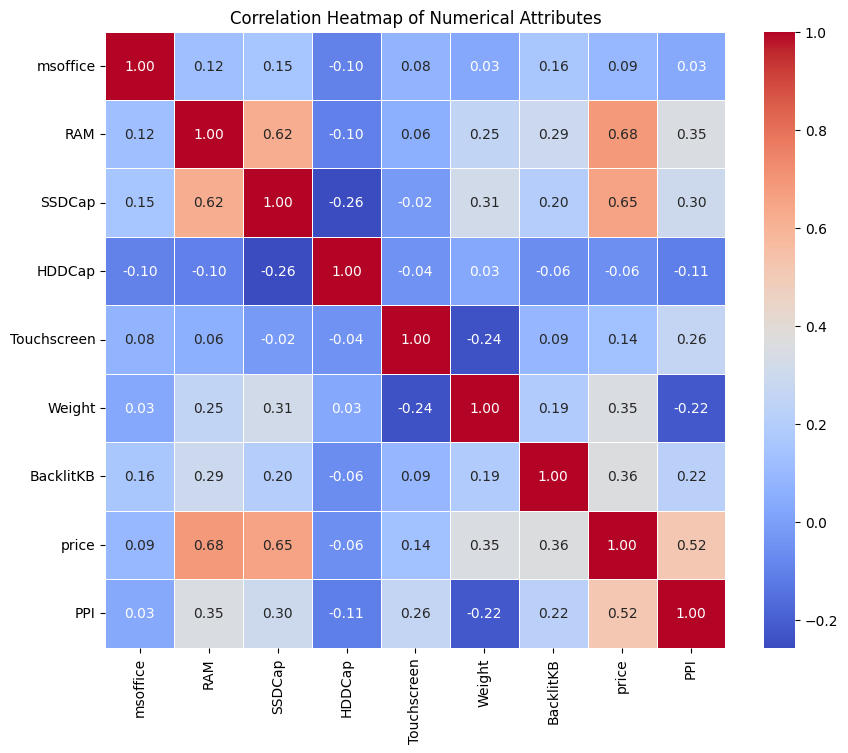

In [92]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

In [93]:
X = df.drop(columns = ['price'])
y = np.log(df['price'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 1910
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1532 non-null   object 
 1   type         1532 non-null   object 
 2   msoffice     1532 non-null   int64  
 3   RAM          1532 non-null   int64  
 4   SSDCap       1532 non-null   int64  
 5   HDDCap       1532 non-null   int64  
 6   GPU          1531 non-null   object 
 7   OS           1532 non-null   object 
 8   Touchscreen  1532 non-null   int64  
 9   refreshrate  1532 non-null   int32  
 10  Weight       1532 non-null   float64
 11  BacklitKB    1532 non-null   int64  
 12  warranty     1532 non-null   int32  
 13  PPI          1532 non-null   float64
 14  Processor    1532 non-null   object 
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 179.5+ KB


In [94]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1532 entries, 0 to 1910
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1532 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [126]:
X_train

,brand,type,msoffice,RAM,SSDCap,HDDCap,GPU,OS,Touchscreen,refreshrate,Weight,BacklitKB,warranty,PPI,Processor
1646,SAMSUNG,Thin and Light Laptop,1,16,1024,0,Intel Integrated Iris X graphics,Windows 11 Home,0,60,1.56,1,1,212.264575,Intel Core i7
39,DELL,Laptop,1,8,512,0,Intel Integrated UHD,Windows 11 Home,0,60,1.83,0,1,141.211998,Intel Core i5
1748,ASUS,Thin and Light Laptop,1,8,512,0,Intel Integrated UHD,Windows 10 Home,0,60,1.40,1,1,157.350512,Intel Core i3
1698,Lenovo,Thin and Light Laptop,1,16,512,0,AMD Radeon Vega Graphics,Windows 11 Home,0,60,1.65,0,2,141.211998,AMD Ryzen 5 Hexa Core
642,Apple,Thin and Light Laptop,0,8,256,0,NIL,macOS Ventura,0,60,1.51,1,1,224.221076,Apple M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,ASUS,Gaming Laptop,1,16,1024,0,NVIDIA GeForce RTX 3050,Windows 11 Home,0,60,1.80,1,1,141.509717,Intel Core i7
338,Acer,Thin and Light Laptop,0,8,512,0,Intel Integrated Graphics,Windows 11 Home,0,60,1.69,0,1,141.211998,Intel Core i3
574,Infinix,Business Laptop,1,32,1024,0,Intel Integrated Iris X graphics,Windows 11 Home,0,60,1.80,1,1,141.211998,Intel Core i9
618,HP,Thin and Light Laptop,1,8,512,0,AMD Radeon Vega Graphics,Windows 11 Home,0,60,1.69,0,1,141.211998,AMD Ryzen 3 Quad Core


In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 6, 7, 14])
], remainder='passthrough')

step2 = LinearRegression()

linear_pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

linear_pipe.fit(X_train, y_train)

y_pred_linear = linear_pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred_linear))
print('MAE:', mean_absolute_error(y_test, y_pred_linear))

R2 score: 0.910064412750866
MAE: 0.11376817136468176


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [99]:
step2 = Ridge(alpha=10)

ridge_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

ridge_pipe.fit(X_train,y_train)

y_pred_ridge = ridge_pipe.predict(X_test)

print('R2 score:',r2_score(y_test,y_pred_ridge))
print('MAE:',mean_absolute_error(y_test,y_pred_ridge))

R2 score: 0.8827736569799706
MAE: 0.132942272662697


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [100]:
step2 = Lasso(alpha=0.001)

lasso_pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

lasso_pipe.fit(X_train,y_train)

y_pred_lasso = lasso_pipe.predict(X_test)

print('R2 score:',r2_score(y_test,y_pred_lasso))
print('MAE:',mean_absolute_error(y_test,y_pred_lasso))

R2 score: 0.894453250685918
MAE: 0.12516536377443405


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [101]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)

elasticnet_pipe = Pipeline([
    ('step1', step1),
    ('elasticnet', elasticnet_model)
])

elasticnet_pipe.fit(X_train, y_train)

# Make predictions using ElasticNet pipeline
y_pred_elasticnet = elasticnet_pipe.predict(X_test)

# Evaluate ElasticNet model
print('R2 score:', r2_score(y_test, y_pred_elasticnet))
print('MAE:', mean_absolute_error(y_test, y_pred_elasticnet))

R2 score: 0.9041379706401582
MAE: 0.12001980428010497


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=250)

rf_pipe = Pipeline([
    ('step1', step1),
    ('rf', rf_model)
])

rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))

R2 score: 0.923380990882068
MAE: 0.08661792511530518


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [103]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_pipe = Pipeline([
    ('step1', step1),
    ('xgb', xgb_model)
])

xgb_pipe.fit(X_train, y_train)

y_pred_xgb = xgb_pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred_xgb))
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))

R2 score: 0.9236685881348115
MAE: 0.083064102341132


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [104]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_pipe = Pipeline([
    ('step1', step1),
    ('knn', knn_model)
])

knn_pipe.fit(X_train, y_train)

y_pred_knn = knn_pipe.predict(X_test)

print('R2 score (KNN):', r2_score(y_test, y_pred_knn))
print('MAE (KNN):', mean_absolute_error(y_test, y_pred_knn))

c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score (KNN): 0.846657032691472
MAE (KNN): 0.14365154412295555


In [116]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define preprocessing step
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 6, 7, 14])
], remainder='passthrough')

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=250)
xgb_model = XGBRegressor()

voting_regressor = VotingRegressor([
    ('elasticnet', elasticnet_model),
    ('linear', linear_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
])

voting_pipe = Pipeline([
    ('step1', step1),
    ('voting_regressor', voting_regressor)
])

voting_pipe.fit(X_train, y_train)

y_pred_vr = voting_pipe.predict(X_test)

print('R2 score (Voting Regressor):', r2_score(y_test, y_pred_vr))
print('MAE (Voting Regressor):', mean_absolute_error(y_test, y_pred_vr))

R2 score (Voting Regressor): 0.9346488245693197
MAE (Voting Regressor): 0.09007750492410048


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [119]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 6, 7, 14])
], remainder='passthrough')

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=250)
xgb_model = XGBRegressor()

base_models = [
    ('elasticnet', elasticnet_model),
    ('linear', linear_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

stk_pipe = Pipeline([
    ('step1', step1),
    ('stacking_regressor', stacking_regressor)
])

stk_pipe.fit(X_train, y_train)

y_pred_stk = stk_pipe.predict(X_test)

print('R2 score (Stacking Regressor):', r2_score(y_test, y_pred_stk))
print('MAE (Stacking Regressor):', mean_absolute_error(y_test, y_pred_stk))

R2 score (Stacking Regressor): 0.9351477839354411
MAE (Stacking Regressor): 0.08538070106534841


c:\Users\vsing\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### We export the best model
- we will export voting regressor as it gave best result although stacking was highest but time was thrice as much

In [122]:
import pickle

# Exporting the trained model
pickle.dump(voting_pipe, open('voting_model.pkl', 'wb'))

# Save DataFrame as CSV
df.to_csv('laptop_data_processed.csv', index=False)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1532 entries, 0 to 1910
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1532 non-null   object 
 1   type         1532 non-null   object 
 2   msoffice     1532 non-null   int64  
 3   RAM          1532 non-null   int64  
 4   SSDCap       1532 non-null   int64  
 5   HDDCap       1532 non-null   int64  
 6   GPU          1531 non-null   object 
 7   OS           1532 non-null   object 
 8   Touchscreen  1532 non-null   int64  
 9   refreshrate  1532 non-null   int32  
 10  Weight       1532 non-null   float64
 11  BacklitKB    1532 non-null   int64  
 12  warranty     1532 non-null   int32  
 13  price        1532 non-null   float64
 14  PPI          1532 non-null   float64
 15  Processor    1532 non-null   object 
dtypes: float64(3), int32(2), int64(6), object(5)
memory usage: 191.5+ KB
